In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import sympy 
from sympy import banded, ones, Matrix, symbols, sqrt, print_latex, oo
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import wofz 

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Asymmetrically Weighted Hermite Linear Response Function

In [4]:
# number of moments
Nv = 6

In [5]:
# symbolic variables
xi, nu = symbols('xi nu') 
k = symbols('k', integer = True)

In [6]:
# advection matrix (off-diagonal)
vec = sympy.zeros(Nv)
for jj in range(1, Nv+1):
    vec[jj-1] = sympy.sqrt(jj)/ (sympy.sqrt(2))

In [7]:
# advection matrix (main-diagonal)
vec2 = sympy.zeros(Nv)
for jj in range(0, Nv+1):
    vec2[jj] = sympy.Rational((jj)*(jj-1)*(jj-2), (Nv-1)*(Nv-2)*(Nv-3))

In [8]:
# create advection tri-diagonal matrix
A = A = banded({1: tuple(vec[0, :-1]), -1: tuple(vec[0, :-1]), 0: tuple(nu*vec2[0, :]/(sympy.I*sympy.sqrt(2)))})

In [9]:
A

Matrix([
[        0, sqrt(2)/2,         0,                0,               0,               0],
[sqrt(2)/2,         0,         1,                0,               0,               0],
[        0,         1,         0,        sqrt(6)/2,               0,               0],
[        0,         0, sqrt(6)/2, -sqrt(2)*I*nu/20,         sqrt(2),               0],
[        0,         0,         0,          sqrt(2), -sqrt(2)*I*nu/5,      sqrt(10)/2],
[        0,         0,         0,                0,      sqrt(10)/2, -sqrt(2)*I*nu/2]])

In [10]:
# idenitity matrix
I = np.eye(Nv, dtype=int)

In [11]:
# invert matrix
M = sympy.Matrix(I*xi - A)

In [12]:
# get final response function 
R_approx = sympy.simplify(sympy.simplify(M.inv()[0, 1]/sympy.sqrt(2)))

In [13]:
# print 
R_approx

(-2*sqrt(2)*nu**3*xi + 54*I*nu**2*xi**2 - 60*I*nu**2 + 150*sqrt(2)*nu*xi**3 - 435*sqrt(2)*nu*xi - 200*I*xi**4 + 1200*I*xi**2 - 750*I)/(-4*sqrt(2)*nu**3*xi**3 + 6*sqrt(2)*nu**3*xi + 108*I*nu**2*xi**4 - 282*I*nu**2*xi**2 + 60*I*nu**2 + 300*sqrt(2)*nu*xi**5 - 1320*sqrt(2)*nu*xi**3 + 885*sqrt(2)*nu*xi - 400*I*xi**6 + 3000*I*xi**4 - 4500*I*xi**2 + 750*I)

In [14]:
# latex code
print_latex(R_approx)

\frac{- 2 \sqrt{2} \nu^{3} \xi + 54 i \nu^{2} \xi^{2} - 60 i \nu^{2} + 150 \sqrt{2} \nu \xi^{3} - 435 \sqrt{2} \nu \xi - 200 i \xi^{4} + 1200 i \xi^{2} - 750 i}{- 4 \sqrt{2} \nu^{3} \xi^{3} + 6 \sqrt{2} \nu^{3} \xi + 108 i \nu^{2} \xi^{4} - 282 i \nu^{2} \xi^{2} + 60 i \nu^{2} + 300 \sqrt{2} \nu \xi^{5} - 1320 \sqrt{2} \nu \xi^{3} + 885 \sqrt{2} \nu \xi - 400 i \xi^{6} + 3000 i \xi^{4} - 4500 i \xi^{2} + 750 i}


## Asymptotic Expansion

### Adiabatic limit $\xi \to 0$

In [15]:
asymptotics_0 = R_approx.series(xi, 0, 3)

In [16]:
asymptotics_0

-750*I/(60*I*nu**2 + 750*I) + xi*(-2*sqrt(2)*nu**3/(60*I*nu**2 + 750*I) - 60*I*nu**2*(6*sqrt(2)*I*nu**3/(60*nu**2 + 750) + 885*sqrt(2)*I*nu/(60*nu**2 + 750))/(60*I*nu**2 + 750*I) - 435*sqrt(2)*nu/(60*I*nu**2 + 750*I) - 750*I*(6*sqrt(2)*I*nu**3/(60*nu**2 + 750) + 885*sqrt(2)*I*nu/(60*nu**2 + 750))/(60*I*nu**2 + 750*I)) + xi**2*(-2*sqrt(2)*nu**3*(6*sqrt(2)*I*nu**3/(60*nu**2 + 750) + 885*sqrt(2)*I*nu/(60*nu**2 + 750))/(60*I*nu**2 + 750*I) - 60*I*nu**2*(282*nu**2/(60*nu**2 + 750) + (-6*sqrt(2)*I*nu**3/(60*nu**2 + 750) - 885*sqrt(2)*I*nu/(60*nu**2 + 750))**2 + 4500/(60*nu**2 + 750))/(60*I*nu**2 + 750*I) + 54*I*nu**2/(60*I*nu**2 + 750*I) - 435*sqrt(2)*nu*(6*sqrt(2)*I*nu**3/(60*nu**2 + 750) + 885*sqrt(2)*I*nu/(60*nu**2 + 750))/(60*I*nu**2 + 750*I) - 750*I*(282*nu**2/(60*nu**2 + 750) + (-6*sqrt(2)*I*nu**3/(60*nu**2 + 750) - 885*sqrt(2)*I*nu/(60*nu**2 + 750))**2 + 4500/(60*nu**2 + 750))/(60*I*nu**2 + 750*I) + 1200*I/(60*I*nu**2 + 750*I)) - 60*I*nu**2/(60*I*nu**2 + 750*I) + O(xi**3)

In [17]:
print_latex(asymptotics_0)

- \frac{750 i}{60 i \nu^{2} + 750 i} + \xi \left(- \frac{2 \sqrt{2} \nu^{3}}{60 i \nu^{2} + 750 i} - \frac{60 i \nu^{2} \cdot \left(\frac{6 \sqrt{2} i \nu^{3}}{60 \nu^{2} + 750} + \frac{885 \sqrt{2} i \nu}{60 \nu^{2} + 750}\right)}{60 i \nu^{2} + 750 i} - \frac{435 \sqrt{2} \nu}{60 i \nu^{2} + 750 i} - \frac{750 i \left(\frac{6 \sqrt{2} i \nu^{3}}{60 \nu^{2} + 750} + \frac{885 \sqrt{2} i \nu}{60 \nu^{2} + 750}\right)}{60 i \nu^{2} + 750 i}\right) + \xi^{2} \left(- \frac{2 \sqrt{2} \nu^{3} \cdot \left(\frac{6 \sqrt{2} i \nu^{3}}{60 \nu^{2} + 750} + \frac{885 \sqrt{2} i \nu}{60 \nu^{2} + 750}\right)}{60 i \nu^{2} + 750 i} - \frac{60 i \nu^{2} \cdot \left(\frac{282 \nu^{2}}{60 \nu^{2} + 750} + \left(- \frac{6 \sqrt{2} i \nu^{3}}{60 \nu^{2} + 750} - \frac{885 \sqrt{2} i \nu}{60 \nu^{2} + 750}\right)^{2} + \frac{4500}{60 \nu^{2} + 750}\right)}{60 i \nu^{2} + 750 i} + \frac{54 i \nu^{2}}{60 i \nu^{2} + 750 i} - \frac{435 \sqrt{2} \nu \left(\frac{6 \sqrt{2} i \nu^{3}}{60 \nu^{2} + 750} + \fra

### Fluid (cold plasma) limit $\xi \to \infty$

In [18]:
asymptotics_inf = R_approx.series(xi, oo, 4)

In [19]:
asymptotics_inf

1/(2*xi**2) + O(xi**(-4), (xi, oo))

In [20]:
print_latex(asymptotics_inf)

\frac{1}{2 \xi^{2}} + O\left(\frac{1}{\xi^{4}}; \xi\rightarrow \infty\right)


## Comparison with Hammett-Perkins 1990's approximation

In [21]:
def Z_fun(z):
    return 1j*np.sqrt(np.pi)*wofz(z)

def R(xi):
    return -(1 + xi*Z_fun(xi))

def RHP3(xi):
    return (1j*xi -2/np.sqrt(np.pi))/(2/np.sqrt(np.pi) - 1j*3*xi - (4/np.sqrt(np.pi))*(xi**2) + 2j*(xi**3))

def RHP4(xi):
    return (-4 +2j*np.sqrt(np.pi)*xi + (3*np.pi -8)*(xi**2))/(4 - 6j*np.sqrt(np.pi)*xi - (9*np.pi -16)*(xi**2) + 4j*np.sqrt(np.pi)* (xi**3) + 2*(3*np.pi - 8)*(xi**4))

def R4(zeta, col):
    return sympy.lambdify((xi, nu), R_approx)(zeta, col)

In [22]:
# define the xi along the real axis 
zeta = 10**np.linspace(-2, 3, int(1e3))

In [23]:
R_HP3 = RHP3(zeta)
R_HP4 = RHP4(zeta)
R_0 = R4(zeta, 0) 
R_1 = R4(zeta, 1) 
R_2 = R4(zeta, 2)
R_3 = R4(zeta, 3)
R_4 = R4(zeta, 4)
R_5 = R4(zeta, 5)
R_7 = R4(zeta, 7)
R_true = R(zeta)

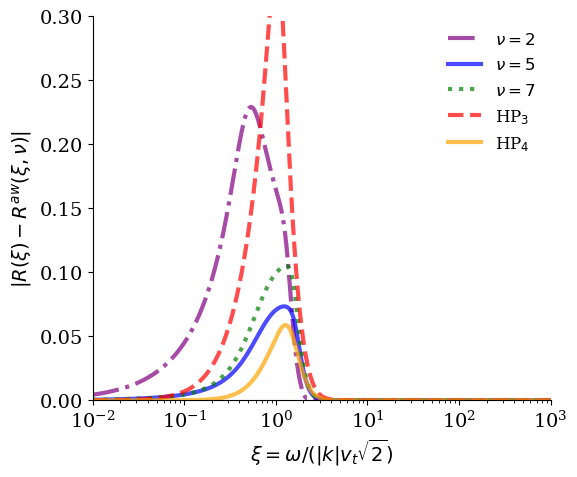

In [24]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(zeta, np.abs(R_2 - R_true), label=r"$\nu=2$", c="purple", ls="-.", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(R_true - R_5), "-", label=r"$\nu=5$", c="blue", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(R_true-R_7), ":", label=r"$\nu=7$", c="green", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(R_true-R_HP3), "--", label=r"HP$_{3}$", c="red", linewidth=3, alpha=0.7)
ax.plot(zeta, np.abs(R_true-R_HP4), "-", label=r"HP$_{4}$", c="orange", linewidth=3, alpha=0.7)

ax.set_ylim(0, 0.3)
#ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|R(\xi) - R^{aw}(\xi, \nu)|$")
ax.set_xlabel(r"$\xi = \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e3)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/symbolic_response_function_AW_collisons_" + str(Nv) + ".png", dpi=200)

## Landau damping dispersion relation

In [25]:
def get_landau_dispersion(func, xi_real, xi_imag, tol=1e-5):
    # initialize vectors 
    k_ = np.zeros(len(xi_real))*np.nan
    gr_ = np.zeros(len(xi_real))*np.nan
    # loop over to find minima
    for ii, xr in enumerate(xi_real):
        r_ = func(xi=xr + 1j*xi_imag) 
        if np.min(np.abs(np.imag(r_))) < tol:
            gr_[ii] = xi_imag[np.nanargmin(np.abs(r_.imag))]
            if r_[np.nanargmin(np.abs(np.imag(r_)))].real>=0:
                k_[ii] = np.sqrt(r_[np.nanargmin(np.abs(r_.imag))].real)
    return gr_[np.argsort(k_)], k_[np.argsort(k_)]

In [26]:
gr_true, k_true = get_landau_dispersion(func=R, xi_real=np.linspace(0, 5, int(1e4)), xi_imag=np.linspace(-1, 0, int(1e4)))

In [27]:
gr_hp3, k_hp3 = get_landau_dispersion(func=RHP3, xi_real=np.linspace(0, 7, int(1e4)), xi_imag=np.linspace(-0.8, 0, int(1e4)))

In [28]:
gr_hp4, k_hp4 = get_landau_dispersion(func=RHP4, xi_real=np.linspace(0, 6, int(1e4)), xi_imag=np.linspace(-0.75, 0, int(1e4)))

In [45]:
gr_l6, k_l6 = get_landau_dispersion(func=lambda xi: R4(xi, col=5), xi_real=np.linspace(0, 5, int(1e4)), xi_imag=np.linspace(-0.75, 0, int(1e4)), tol=5e-6)

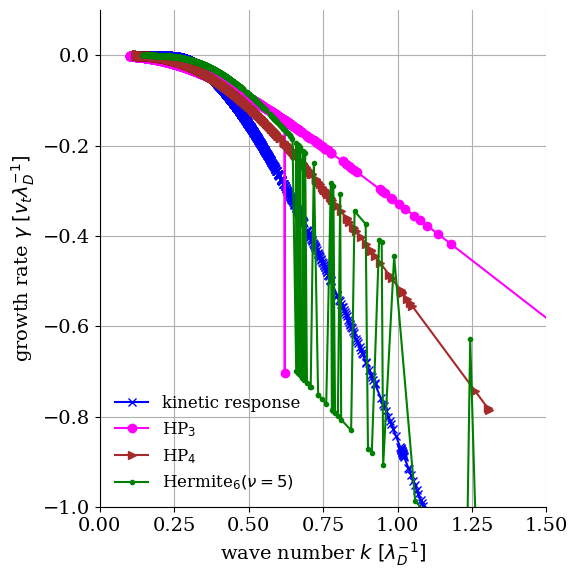

In [46]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(k_true, gr_true*np.sqrt(2)*k_true, label=r"kinetic response", c="blue", marker="x")
ax.plot(k_hp3,  gr_hp3*np.sqrt(2)*k_hp3, label=r"HP$_{3}$", c="magenta", marker="o")
ax.plot(k_hp4,  gr_hp4*np.sqrt(2)*k_hp4, label=r"HP$_{4}$", c="brown", marker=">")
ax.plot(k_l6,  gr_l6*np.sqrt(2)*k_l6, label=r"Hermite$_{6}(\nu=5)$ ", c="green", marker=".")

ax.set_ylabel(r"growth rate $\gamma$ $[v_{t}\lambda_{D}^{-1}]$")
ax.set_xlabel(r"wave number $k$ $[\lambda_{D}^{-1}]$")
ax.set_ylim(-1, 0.1)
ax.set_xlim(0, 1.5)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower left')
legend.get_frame().set_alpha(0)
plt.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

plt.savefig("figs/landau_damping_hp_collisions.png", dpi=200)

## Bump-on-tail dispersion relation

In [53]:
# Despersion relation
def disp_k_bot(xi, n1=0.8, u1=0, u2=3, T=1):
    return -n1*R(xi=(xi-u2)) - (1-n1)*R(xi=((xi-u1)/T))

# Despersion relation
def disp_k_hp3_bot(xi, n1=0.8, u1=0, u2=3, T=1):
    return -n1*RHP3(xi=(xi-u2)) - (1-n1)*RHP3(xi=(xi-u1)/T)

# Despersion relation
def disp_k_hp4_bot(xi, n1=0.8, u1=0, u2=3, T=1):
    return -n1*RHP4(xi=(xi-u2)) -(1-n1)*RHP4(xi=(xi-u1)/T)

# Despersion relation
def disp_k_6_bot(xi, n1=0.8, u1=0, u2=3, T=1):
    return -n1*R6(xi=(xi-u2)) -(1-n1)*R6(xi=(xi-u1)/T)

In [54]:
gr_true, k_true = get_landau_dispersion(func=disp_k_bot, xi_real=np.linspace(1E-2, 2, int(1e4)), xi_imag=np.linspace(0.001, 1, int(1e4)), tol=1e-6)

In [55]:
gr_hp3, k_hp3 = get_landau_dispersion(func=disp_k_hp3_bot, xi_real=np.linspace(0, 2, int(1e4)), xi_imag=np.linspace(0.001, 1, int(1e4)), tol=1e-6)

In [56]:
gr_hp4, k_hp4 = get_landau_dispersion(func=disp_k_hp4_bot, xi_real=np.linspace(0, 2, int(1e4)), xi_imag=np.linspace(0.001, 1, int(1e4)), tol=1e-6)

In [57]:
gr_l16, k_l16 = get_landau_dispersion(func=disp_k_6_bot, xi_real=np.linspace(0, 4, int(1e3)), xi_imag=np.linspace(0, 3, int(1e3)), tol=1e-3)

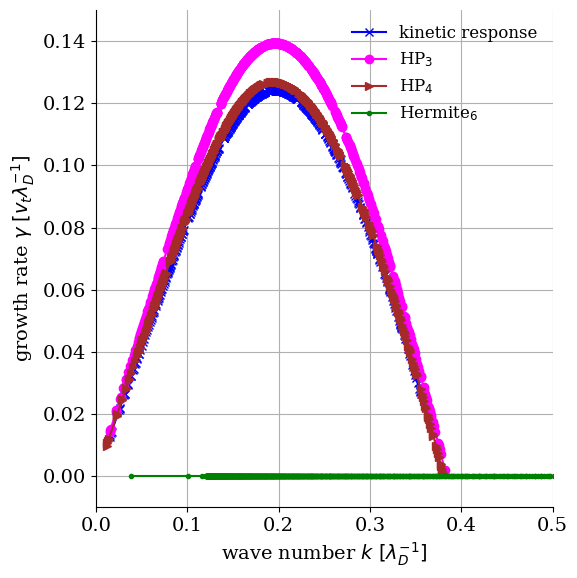

In [58]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(k_true, gr_true*np.sqrt(2)*k_true, label=r"kinetic response", c="blue", marker="x")
ax.plot(k_hp3,  gr_hp3*np.sqrt(2)*k_hp3, label=r"HP$_{3}$", c="magenta", marker="o")
ax.plot(k_hp4,  gr_hp4*np.sqrt(2)*k_hp4, label=r"HP$_{4}$", c="brown", marker=">")
ax.plot(k_l6,  gr_l6*np.sqrt(2)*k_l6, label=r"Hermite$_{6}$", c="green", marker=".")

ax.set_ylabel(r"growth rate $\gamma$ $[v_{t}\lambda_{D}^{-1}]$")
ax.set_xlabel(r"wave number $k$ $[\lambda_{D}^{-1}]$")
ax.set_ylim(-0.01, 0.15)
ax.set_xlim(0., 0.5)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

plt.savefig("figs/bump_on_tail_hp_collisions.png", dpi=200)